Carregando as bibliotecas

In [1]:
# Bring data into workspace and replicate plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importando o arquivo de vendas "default.csv"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Inspecionando os 10 primeiros objetos.

In [3]:
df_data = pd.read_csv('/content/drive/MyDrive/Data/Default.csv')
#df_adv = df_adv.iloc[: , 1:] #remove primeira coluna.
df_data.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


Convertendo as colunas de default e student de texto para números binários.

In [4]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_data["default"] = ord_enc.fit_transform(df_data[["default"]])
df_data["student"] = ord_enc.fit_transform(df_data[["student"]])

df_data.head()

,default,student,balance,income
0,0.0,0.0,729.526495,44361.625074
1,0.0,1.0,817.180407,12106.134700
2,0.0,0.0,1073.549164,31767.138947
3,0.0,0.0,529.250605,35704.493935
4,0.0,0.0,785.655883,38463.495879


Calculando resumos estatísticos de todos os atributos.

In [5]:
df_data.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


Plotando histogramas de cada coluna.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f430c2f1a10>,
      dtype=object)

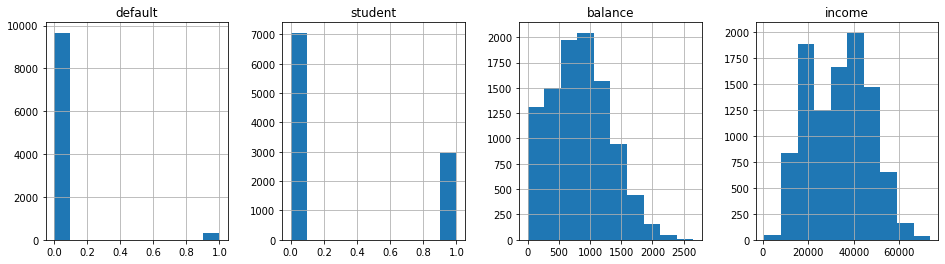

In [6]:
df_data.hist(column=["default","student", "balance","income"], layout=(1,4), figsize=(16,4))

Vamos criar duas subamostras contendo 70% das observações para Treino e 30% das observações para teste.

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_data,test_size=0.3, random_state=24)

X_train = df_train[['student','balance','income']].values.reshape(-1,np.size([['student','balance','income']]))
X_test = df_test[['student','balance','income']].values.reshape(-1,np.size([['student','balance','income']]))
y_train = df_train['default'].values.reshape(-1,1)
y_test = df_test['default'].values.reshape(-1,1)

Vamos utilizar o classificador KNN do pacote scikit learn.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=3)

modelo_knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [9]:
y_train_pred = modelo_knn.predict(X_train)
y_test_pred = modelo_knn.predict(X_test)

In [10]:
erro_train = y_train_pred != y_train
erro_test = y_test_pred != y_test

[np.mean(erro_train),np.mean(erro_test)]

[0.05102497959183674, 0.04576466666666667]

Calculando a matriz de confusão, utiliando o pacote metrics.

In [11]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred, labels=[1,0])

conf_matrix = conf_matrix.astype(float)
conf_matrix 

array([[  14.,   85.],
       [  27., 2874.]])

Outra forma de apresentar a matriz de confusão é como taxas.

In [12]:
P = sum(y_test)
N = sum(y_test==0)

conf_matrix[0,0] = conf_matrix[0,0]/P
conf_matrix[1,0] = conf_matrix[1,0]/N
conf_matrix[0,1] = conf_matrix[0,1]/P
conf_matrix[1,1] = conf_matrix[1,1]/N

conf_matrix

array([[0.14141414, 0.85858586],
       [0.00930714, 0.99069286]])

Calcular a precisão (Precision) TP/(TP+FP).

In [13]:
metrics.precision_score(y_test, y_test_pred)

0.34146341463414637

Normalizando as distâncias. Importante notar que os novos data points, ou seja, a base de teste precisa ser ajustada com referência a média e desvio padrão da base de treino e não de teste---> scaler.fit(X_train).transform(X_test).

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_norm = scaler.fit(X_train).transform(X_train)
X_test_norm = scaler.fit(X_train).transform(X_test)

In [15]:
modelo_knn.fit(X_train_norm, y_train.ravel())

y_train_pred = modelo_knn.predict(X_train_norm)
y_test_pred = modelo_knn.predict(X_test_norm)

In [16]:
erro_train = y_train_pred != y_train
erro_test = y_test_pred != y_test

[np.mean(erro_train),np.mean(erro_test)]

[0.05395771428571428, 0.051057333333333337]

Calculando a matriz de confusão, utiliando o pacote metrics.

In [17]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred, labels=[1,0])

conf_matrix = conf_matrix.astype(float)
conf_matrix 

array([[  28.,   71.],
       [  30., 2871.]])

Outra forma de apresentar a matriz de confusão é como taxas.

In [18]:
P = sum(y_test)
N = sum(y_test==0)

conf_matrix[0,0] = conf_matrix[0,0]/P
conf_matrix[1,0] = conf_matrix[1,0]/N
conf_matrix[0,1] = conf_matrix[0,1]/P
conf_matrix[1,1] = conf_matrix[1,1]/N

conf_matrix

array([[0.28282828, 0.71717172],
       [0.01034126, 0.98965874]])

Calcular a precisão (Precision) TP/(TP+FP).

In [19]:
metrics.precision_score(y_test, y_test_pred)

0.4827586206896552